![](files/images/EscUpmPolit_p.gif "UPM")

<header style="width: 100%; position: relative; text-align: center;">
  <div style="width: 80%; display: inline-block;">
    <h1 style="margin: 0; margin-bottom: 10px;">Procesado de datos de Blockchain</h1>
    <h3 style="margin: 0; margin-bottom: 20px;">TFM</h3>
    <h5 style="margin: 0;">Universidad Politécnica de Madrid. © Pablo Ruiz Giles</h5>
  </div>
</header>


<section id="comprar">
  <h1>Eliminar</h1>

</section>

A continuación se presenta un breve resumen de los puntos que se tratarán en el notebook:

- Eliminar: Esta sección se enfoca en la eliminación de datos específicos en el conjunto de datos.

- Importar datasets: Se explica cómo importar los conjuntos de datos necesarios para el estudio, incluyendo los datasets paralelo y Etherscan.

- Procesamiento de los datos: En esta sección se describen los procesos aplicados a los datos, como la modificación de la columna de Coste en wei y la conversión del gas utilizado de formato hexadecimal a decimal.

- Representación: Aquí se presentan diferentes formas de representación gráfica, incluyendo la representación del coste en Ether, la representación del coste y la duración en Ether, y la representación del gas y la duración en Ether.

<h1>Índice</h1>
	<ul>
		<li><h3>Eliminar</h3></li>
		<li>Importar datasets
			<ul>
				<li><a href="#paralelo">Paralelo</a></li>
				<li><a href="#etherscan">Etherscan</a></li>
			</ul>
		</li>
		<li>Procesamos los datos
			<ul>
				<li><a href="#modificacion-wei">Modificación de la columna Coste en wei</a></li>
				<li><a href="#conversion-hex-dec">Conversión de hexadecimal a decimal Gas utilizado</a></li>
			</ul>
		</li>
		<li>Representación
			<ul>
				<li><a href="#representacion-coste-total">Representación de Coste en Ether</a></li>
				<li><a href="#representacion-coste-duracion">Representación de Coste y la duración en ether</a></li>
				<li><a href="#representacion-gas-duracion">Representación del gas y la duración en ether</a></li>
			</ul>
		</li>
	</ul>


# Importamos los datasets

<section id="paralelo">
  <h2>Eliminar Datasets</h2>

</section>

Importamos los datastes de datos y creamos un diccionario llamado datasets_resumen que contiene los datos anteriormente importados

In [1]:
import pandas as pd
import os

# Obtener la lista de carpetas en la carpeta datos/paralelo/
carpetas = [f for f in os.listdir('datos/eliminar/') if os.path.isdir(os.path.join('datos/eliminar/', f))]

# Crear un diccionario vacío para almacenar los DataFrames
datasets_resumen = {}
# Lista de archivos a excluir
archivos_excluidos = ['avalanche', 'celo']

# Leer cada archivo CSV en cada carpeta y asignarlo a una variable con el nombre de la carpeta
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/eliminar/', carpeta)) if f.endswith('eliminar_resumen3.csv')and not any(x in f for x in archivos_excluidos)]
    for f in csv_files:
        name = os.path.splitext(f)[0]
        name_without_suffix = name.replace('_eliminar_resumen3', '')
        vars()[name] = pd.read_csv(os.path.join('datos/eliminar/', carpeta, f))
        datasets_resumen[name_without_suffix] = eval(name)

# Imprimir los nombres de las variables creadas que contengan "_paralelodatos1"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_resumen.keys()):
    print(var)


Los siguientes DataFrames se han creado:
arbitrum
boba
goerli
optimism
sepolia


<section id="etherscan">
  <h2>Etherscan Datasets</h2>

</section>

Importamos los datastes de ethercan y creamos un diccionario llamado datasets_scan que contiene los datos anteriormente importandos

In [2]:
import pandas as pd
import os

# Crear un diccionario vacío para almacenar los DataFrames
datasets_scan = {}

# Obtener los archivos CSV en todas las subcarpetas que contengan '_secuencial' en su nombre
csv_files = []
for root, dirs, files in os.walk('datos/scan/'):
    for f in files:
        if 'scan' in f and f.endswith('.csv'):
            csv_file_path = os.path.join(root, f)
            name = os.path.splitext(os.path.basename(csv_file_path))[0]
            df = pd.read_csv(csv_file_path)
            vars()[name] = df
            datasets_scan[name] = df

# Imprimir los nombres de los DataFrames creados
print("Los siguientes DataFrames se han creado:")
for var_name in sorted(datasets_scan.keys()):
    print(var_name)


Los siguientes DataFrames se han creado:
scan_arbitrum
scan_avalanche
scan_boba
scan_celo
scan_goerli
scan_optimism
scan_sepolia


#### Visualizamos el tipo de datos que contiene etherscan

In [3]:
# Imprimir los nombres de las variables creadas que contengan "scan"
print("Los siguientes DataFrames se han creado:")
for var in sorted(datasets_scan.keys()):
    if 'scan' in var:
        print(var)

        # Acceder a cada DataFrame y asignar el índice a la columna "index_col"
        datasets_scan[var]['index_col'] = datasets_scan[var].index
        datasets_scan[var].info()

Los siguientes DataFrames se han creado:
scan_arbitrum
<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0x60fefc9d415057be9422701b7b470afef223402020fdbcb9f642f5399294debf to 0xb98ba76b2aa7a6237947cf677e13d9a4f265c2d38b912dfca57d20c87b463101
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Txhash                 117 non-null    int64  
 1   Blockno                117 non-null    int64  
 2   UnixTimestamp          117 non-null    object 
 3   DateTime               117 non-null    object 
 4   From                   106 non-null    object 
 5   To                     11 non-null     object 
 6   ContractAddress        117 non-null    float64
 7   Value_IN(ETH)          117 non-null    int64  
 8   Value_OUT(ETH)         117 non-null    float64
 9   CurrentValue @ $0/Eth  117 non-null    float64
 10  TxnFee(ETH)            117 non-null    float64
 11  TxnFee(USD)            115 non-null 

In [4]:
scan_sepolia['CurrentValue @ $0/Eth']

0x2ba958925512bc001ad998db5d7323deb4009f536bd01685ac40f193382db6bf    0.004907
0xaf2d1770d56bbff3511de38d8d46563535771d0bacc368019b0f4cb0ced09329    0.004907
0xcea1652e870fdd411c4a032a4c6357f4436c4e20a53095795013db0c09a2b90d    0.004907
0x062a7eb4b937dedeaaf052b483aad1709f893ff08fb6fa846b7e2bbf402d9c9b    0.004907
0x6ef5523d2706e7fce4240f88c99e52d857002405225b154d08a6f32cf3033d28    0.004907
                                                                        ...   
0x2b2abe3fcd305ba146c2e9649e220d07fc8d072da0f73839c0450aefe9af5126    0.000164
0x0a35f6ef1a9d96b5ee256e347e68c2e56546393e020f9b7de15dc68e8de921e3    0.000224
0xe9bbf8f437e3ded657c5fa023330f4a4dadbb2774414ae0d1e072a5c74d1bf3b    0.000187
0x6ddaba4ab985fa88ad834535acdc18582032e823720587b78802da5874e30d23    0.067051
0x5c89f0a3c1ba1b723fcbd1953525b7c978e49888155d3228678f6c5f788d9b9c    0.000926
Name: CurrentValue @ $0/Eth, Length: 273, dtype: float64

In [5]:
scan_celo['CurrentValue @ $0/Eth']

0x20ecffa91082ba63f0a188dca44018b708a49d614c0a7cdbe7f24ecb1eb107dc    0.000137
0xc0d946c7622cbd3c00dab4f7e2dcad2762d0551f5df60d5fa99911d9df7175b2    0.058074
0x0128ffcdef3e97af015d01c6f845a8a846447b7108cfc681f56d2865333eda08    0.053620
0xd79e7e2e53cc1f6f1fb13a8c36893aceaf3b7a90d2fab2dbaee9553fe089ded3    0.001639
0x030a747d12f8b9d7ad7c8a0bbdac807e1a7dd0ebdb57af9b18e9f9bd54e2f10f    0.001640
0xeb4c2d9130d47eafe2ee9f0601a9bd1114f75702def331c1ca78125262e20e03    0.001640
0xf5e2695ed79dc4bf95d3cdd97f0d1af031c3fa42f96e6f737a1bc3ed89ab761d    0.001245
0x2c1c385761d3b85eb6ced76c0580b473e93a87882979a744899421bb83d2b359    0.001245
0x7a3e08ca5ab86f4625748b27f3bc5b5f9c7b1332d997ba055046fb3b3778f865    0.001245
0x5744eb486659101d6dc42eb629b35c8b8b685a20aec8ec6b62323b071b11c3af    0.001245
0x175b6b51be7d03daa788d8d6eadb2055a6e6964225b640a2c77e2511471e9f8b    0.001245
0x83507b13b26f217486e6efc72d79dbd63ed7f43bae81db09529fc90aafc8550b    0.001245
0xd2fd5bf4b45dd3eaf70815883a929c0007fa729f6e7291f908

# Procesamos los datos

<section id="modificacion-wei">
  <h2>Modificación de la columna Coste en wei</h2>

</section>

Creamos una lista llamada formatted_transactions que contiene los hashes de las operaciones que hemos realizado. Estos hashes se obtienen de los datasets de datos que se encuentran dentro de datasets_resumen

In [6]:
# Crear una lista con todas las transacciones formateadas como cadenas
formatted_transactions = []
for dataset in datasets_resumen.values():
    transacciones = [valor for valor in dataset['Transacción']]
    formatted_transactions += [str(valor)[:-1] for valor in transacciones]


In [7]:
len(formatted_transactions)

5

Creamos un nuevo dataframe llamado df que contiene los hashes de las transacciones que coinciden con las de formatted_transactions y guardamos el valor de CurrentValue @ $0/Eth que indica el coste de la transacción. A su vez también se crea una nueva columna llamada index_col que guarda la dirección del hash

In [8]:
import pandas as pd

# Crear un DataFrame vacío para almacenar los DataFrames filtrados concatenados
df = pd.DataFrame()

# Iterar sobre las direcciones
for direccion in formatted_transactions:
    # Buscar en los datasets que empiezan con 'scan_' y contienen la dirección actual
    dataframes_direccion = [datasets_scan[k][datasets_scan[k]['index_col'] == direccion][['index_col', 'CurrentValue @ $0/Eth']] for k in datasets_scan.keys() if k.startswith('scan_')]

    # Concatenar los DataFrames filtrados en un solo DataFrame
    df = pd.concat([df] + dataframes_direccion)

# Imprimir información sobre el DataFrame concatenado resultante
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0xb98ba76b2aa7a6237947cf677e13d9a4f265c2d38b912dfca57d20c87b463101 to 0x5977333d235ed70ae06d35a0edd552e436a025838a3e892ca8d6cbaf6813892f
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index_col              5 non-null      object 
 1   CurrentValue @ $0/Eth  5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes
None


Vemos la longitud del dataframe df. En este caso deberia de ser 12 * el numero de etherscan que se hayan cargado

In [9]:
# Imprimir la longitud del DataFrame
print(len(df))



5


A continuación, vemos que valores de la columna index_col de df coinciden con la columna Transacción de los datasets de datos. Los que coincidan se sustituirá el valor de Coste en wei por el de CurrentValue @ $0/Eth que es el correcto

In [10]:
arbitrum_eliminar_resumen3['Coste en wei']

0    0.000003
Name: Coste en wei, dtype: float64

In [11]:
# Iterar sobre los DataFrames en el diccionario `datasets_resumen`
for k, df_resumen in datasets_resumen.items():
    # Iterar sobre las transacciones en el DataFrame `df`
    for index, row in df.iterrows():
        # Obtener la dirección de la transacción actual
        direccion = row['index_col']
        # Añadimos : para que sea igual a las transacciones de los datos
        direccion = row['index_col'] + ":"

        # Obtener el valor de la transacción actual
        valor = row['CurrentValue @ $0/Eth']
        # Buscar si la dirección de la transacción actual coincide con la columna "Transacción" del DataFrame del diccionario `datasets_resumen`
        mask = df_resumen['Transacción'] == direccion
        # Si hay una coincidencia, establecer el valor de "Coste en wei" en el valor de la transacción actual
        if mask.any():
            df_resumen.loc[mask, 'Coste en wei'] = valor

In [12]:
arbitrum_eliminar_resumen3['Coste en wei']

0    0.000031
Name: Coste en wei, dtype: float64

In [13]:
goerli_eliminar_resumen3

,Transacción,Gas utilizado,Coste en wei,Duración
0,0x5977333d235ed70ae06d35a0edd552e436a025838a3e...,0x7895,0.000772,13020


In [14]:
import os

# Obtener la lista de carpetas en la carpeta datos/secuencial/
carpetas = [f for f in os.listdir('datos/eliminar/') if os.path.isdir(os.path.join('datos/eliminar/', f))]

# Crear una lista para almacenar los nombres de los datasets
datasets = []
# Lista de archivos a excluir
archivos_excluidos = ['avalanche', 'celo']
# Leer cada archivo CSV en cada carpeta y agregarlo a la lista datasets si termina en "_datos.csv"
for carpeta in carpetas:
    csv_files = [f for f in os.listdir(os.path.join('datos/eliminar/', carpeta)) if f.endswith('_eliminar_resumen3.csv') and not any(x in f for x in archivos_excluidos)]
    for f in csv_files:
        datasets.append(os.path.splitext(f)[0])

# Imprimir los nombres de los datasets creados
print("Los siguientes datasets se han creado:")
for dataset in datasets:
    print(dataset)


Los siguientes datasets se han creado:
arbitrum_eliminar_resumen3
optimism_eliminar_resumen3
sepolia_eliminar_resumen3
boba_eliminar_resumen3
goerli_eliminar_resumen3



<section id="conversion-hex-dec">
  <h2>Conversión de hexadecimal a decimal Gas utilizado</h2>

</section>


In [15]:
#Gas utilizado 
import pandas as pd

def hex_to_dec(datos):
    # Convierte la columna "Gas utilizado" de hexadecimal a decimal
    datos["Gas utilizado"] = datos["Gas utilizado"].apply(lambda x: int(x, 16))
    
    # Devuelve el DataFrame modificado
    return datos


# Iterar sobre la lista de nombres de datasets
for dataset in datasets:
    # Aplicar la función a la columna "Gas utilizado" del DataFrame
    globals()[dataset] = hex_to_dec(globals()[dataset])
    
    # Imprimir el DataFrame resultante
    print(globals()[dataset].head())


                                         Transacción  Gas utilizado  \
0  0xb98ba76b2aa7a6237947cf677e13d9a4f265c2d38b91...          30869   

   Coste en wei  Duración  
0      0.000031      2962  
                                         Transacción  Gas utilizado  \
0  0x9cbbb3c01632e8a6924caba42117513952665b586be8...          30869   

   Coste en wei  Duración  
0      0.000772      6792  
                                         Transacción  Gas utilizado  \
0  0x5c89f0a3c1ba1b723fcbd1953525b7c978e49888155d...          30869   

   Coste en wei  Duración  
0      0.000926     13306  
                                         Transacción  Gas utilizado  \
0  0x71fe7e478ec2aac05a0f246a98da2bfe048eb766c043...          36722   

   Coste en wei  Duración  
0      0.000037      2396  
                                         Transacción  Gas utilizado  \
0  0x5977333d235ed70ae06d35a0edd552e436a025838a3e...          30869   

   Coste en wei  Duración  
0      0.000772     13020  


## Representación

<section id="representacion-coste-total">
  <h2>Representación de Coste en Ether</h2>

</section>


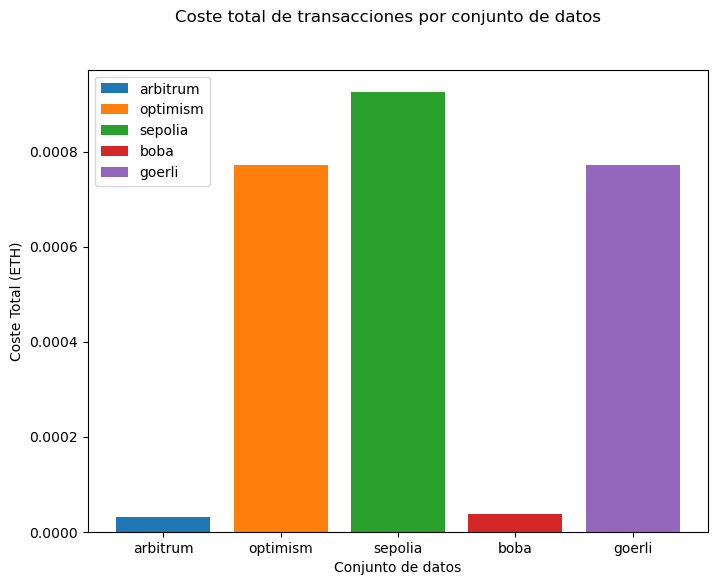

In [16]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de barras para cada conjunto de datos en datasets_resumen
for dataset_name, dataset_values in datasets_resumen.items():
    y = dataset_values['Coste en wei']
    ax.bar(dataset_name, y, label=dataset_name)
    
# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Conjunto de datos')
ax.set_ylabel('Coste Total (ETH)')
ax.legend()
fig.suptitle('Coste total de transacciones por conjunto de datos')
plt.show()


<section id="representacion-coste-duracion">
  <h2>Representación de Coste y la duración en ether</h2>
</section>

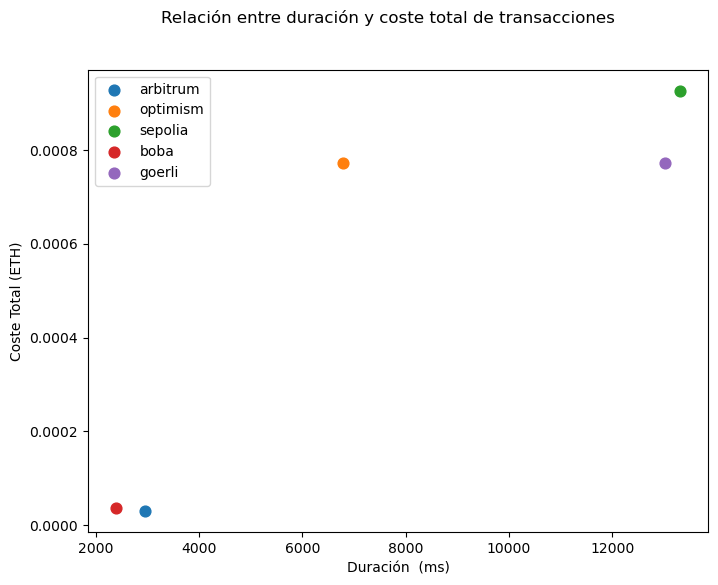

In [17]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de dispersión para cada conjunto de datos en datasets_resumen
for dataset_name, dataset_values in datasets_resumen.items():
    x = dataset_values['Duración']
    y = dataset_values['Coste en wei']
    ax.scatter(x, y, s=60, label=dataset_name)
    
# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Duración  (ms)')
ax.set_ylabel('Coste Total (ETH)')
ax.legend()
fig.suptitle('Relación entre duración y coste total de transacciones')
plt.show()


<section id="representacion-gas-duracion">
  <h2>Representación del gas y la duración en ether</h2>

</section>

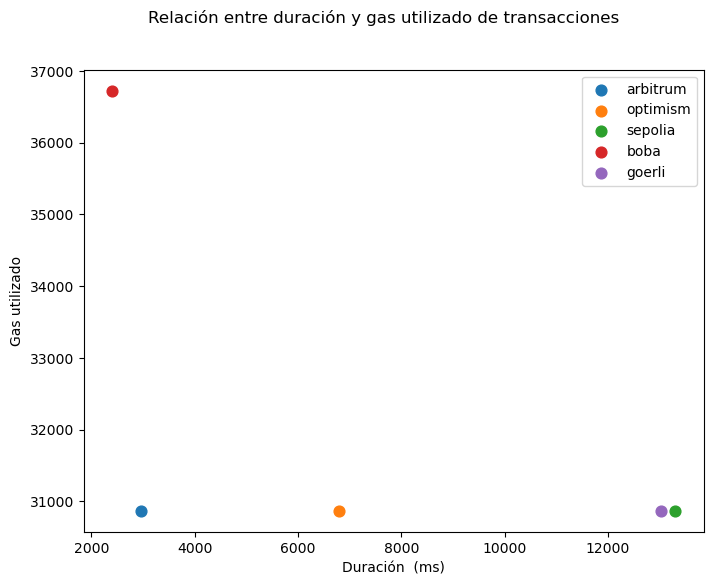

In [18]:
import matplotlib.pyplot as plt

# Configuración del gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Crear el gráfico de dispersión para cada conjunto de datos en datasets_resumen
for dataset_name, dataset_values in datasets_resumen.items():
    x = dataset_values['Duración']
    y = dataset_values['Gas utilizado']
    ax.scatter(x, y, s=60, label=dataset_name)
    
# Configurar las etiquetas y leyendas del gráfico
ax.set_xlabel('Duración  (ms)')
ax.set_ylabel('Gas utilizado')
ax.legend()
fig.suptitle('Relación entre duración y gas utilizado de transacciones')
plt.show()
